Data from datausa: https://datausa.io/profile/geo/atlanta-ga

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('classic')

In [291]:
los_angeles_df = pd.read_csv("/Users/ryanmdalton/Downloads/CommuterTransportation.csv")
san_francisco_df = pd.read_csv("/Users/ryanmdalton/Downloads/CommuterTransportation2.csv")
chicago_df = pd.read_csv("/Users/ryanmdalton/Downloads/CommuterTransportation3.csv")
houston_df = pd.read_csv("/Users/ryanmdalton/Downloads/CommuterTransportation4.csv")
atlanta_df = pd.read_csv("/Users/ryanmdalton/Downloads/CommuterTransportation5.csv")
new_york_df = pd.read_csv("/Users/ryanmdalton/Downloads/Commuter Transportation.csv")

In [289]:
full_df = [los_angeles_df, san_francisco_df, chicago_df, houston_df, atlanta_df, new_york_df]

,ID Group,Group,ID Year,Year,Commute Means,Commute Means Moe,Geography,ID Geography,Slug Geography,share
0,4,Motorcycle,2017,2017,238540,9648.000000,United States,01000US,united-states,0.001561
1,8,Worked At Home,2017,2017,173304,6987.000000,"New York, NY",16000US3651000,new-york-ny,0.042552
2,7,Other,2017,2017,22946,3114.000000,"New York, NY",16000US3651000,new-york-ny,0.005634
3,1,Carpooled,2017,2017,13604253,77767.855461,United States,01000US,united-states,0.089032
4,6,Walked,2017,2017,411388,13299.000000,"New York, NY",16000US3651000,new-york-ny,0.101010
...,...,...,...,...,...,...,...,...,...,...
85,8,Worked At Home,2013,2013,157525,7801.000000,"New York, NY",16000US3651000,new-york-ny,0.041300
86,2,Public Transit,2013,2013,7393159,47840.600414,United States,01000US,united-states,0.051714
87,5,Bicycle,2013,2013,46065,4450.000000,"New York, NY",16000US3651000,new-york-ny,0.012077
88,0,Drove Alone,2013,2013,109277215,130448.000000,United States,01000US,united-states,0.764377


In [ ]:
###on first pass, will manually collect data by type. Second pass, automate this into a function so that plots
###can be automatically generated for a commute type.

In [30]:
la_drove_alone = los_angeles_df[(los_angeles_df['Group'] == 'Drove Alone') & (los_angeles_df['Geography'] != 'United States')]

sf_drove_alone = san_francisco_df[(san_francisco_df['Group'] == 'Drove Alone') & (san_francisco_df['Geography'] != 'United States')]

chicago_drove_alone = chicago_df[(chicago_df['Group'] == 'Drove Alone') & (chicago_df['Geography'] != 'United States')]

houston_drove_alone = houston_df[(houston_df['Group'] == 'Drove Alone') & (houston_df['Geography'] != 'United States')]

atlanta_drove_alone = atlanta_df[(atlanta_df['Group'] == 'Drove Alone') & (atlanta_df['Geography'] != 'United States')]

us_drove_alone = los_angeles_df[(los_angeles_df['Group'] == 'Drove Alone') & (los_angeles_df['Geography'] == 'United States')]

In [166]:
#automate build of dfs:
#la_drove_alone = los_angeles_df[(los_angeles_df['Group'] == 'Drove Alone') & (los_angeles_df['Geography'] != 'United States')]
#build a df from one city:

def build_restricted_df(type_of_transpo):
    output_df = los_angeles_df[(los_angeles_df['Group'] == str(type_of_transpo)) & (los_angeles_df['Geography'] != 'United States')]
    return output_df
    
    

In [167]:
##automate build from any city:

def build_restricted_df(city_df, type_of_transpo):
    output_df = city_df[(city_df['Group'] == str(type_of_transpo)) & (city_df['Geography'] != 'United States')]
    return output_df

In [168]:
build_restricted_df(los_angeles_df, 'Drove Alone')

,ID Group,Group,ID Year,Year,Commute Means,Commute Means Moe,Geography,ID Geography,Slug Geography,share
16,0,Drove Alone,2017,2017,3622985,22850.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.746004
33,0,Drove Alone,2016,2016,3525431,23176.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.739109
38,0,Drove Alone,2015,2015,3489716,23252.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.741300
55,0,Drove Alone,2014,2014,3382298,22556.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.731495
89,0,Drove Alone,2013,2013,3264307,21699.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.726654


In [195]:


la, houston = build_restricted_df(los_angeles_df, 'Drove Alone'), build_restricted_df(houston_df, 'Drove Alone')




In [294]:
output_df = pd.DataFrame()
df_list = [los_angeles_df, san_francisco_df, chicago_df, houston_df, atlanta_df, new_york_df]

In [ ]:
output_df = output_df.append(build_restricted_df(df_list[0], 'Motorcycle'))

In [270]:
##build from cities list:

specific_df = pd.DataFrame()
for i in df_list:
    specific_df = specific_df.append(build_restricted_df(i, 'Motorcycle'))


In [312]:
#automate from cities list:

def build_restricted_df(city_df, type_of_transpo):
    '''takes a city dataframe as an input and returns a dataframe of defined transportation type'''
    output_df = city_df[(city_df['Group'] == str(type_of_transpo)) & (city_df['Geography'] != 'United States')]
    return output_df

In [316]:
###for example:

sf = build_restricted_df(san_francisco_df, 'Motorcycle')
sf.head()

,ID Group,Group,ID Year,Year,Commute Means,Commute Means Moe,Geography,ID Geography,Slug Geography,share
8,4,Motorcycle,2017,2017,5370,1549.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.010261
35,4,Motorcycle,2016,2016,5449,1457.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.010888
36,4,Motorcycle,2015,2015,3894,1008.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.007833
63,4,Motorcycle,2014,2014,4095,1104.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.008514
81,4,Motorcycle,2013,2013,4405,1155.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.009324


In [321]:
def build_year_restricted_df(city_df, type_of_transpo, year):
    '''takes a city dataframe as an input and returns a dataframe of defined transportation type and year'''
    output_df = city_df[(city_df['Group'] == str(type_of_transpo)) & (city_df['Geography'] != 'United States') 
                        & (city_df['Year'] == year)]
    return output_df

In [322]:
##for example:

sf_2017 = build_year_restricted_df(san_francisco_df, 'Motorcycle', 2017)
sf_2017

,ID Group,Group,ID Year,Year,Commute Means,Commute Means Moe,Geography,ID Geography,Slug Geography,share
8,4,Motorcycle,2017,2017,5370,1549.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.010261


In [332]:
def build_transpo_sets(df_list, type_of_transpo):
    '''takes as arguments a list of dataframes and a type of transportation, referred to as a group in the dfs we have.
    Returns a dataframe of all cities in the dataframes list and stats on commuters of the type_of_transpo'''
    
    specific_df = pd.DataFrame()
    for i in df_list:
        specific_df = specific_df.append(build_restricted_df(i, type_of_transpo))
    return specific_df

In [333]:
def build_yearly_transpo_sets(df_list, type_of_transpo, year):
    
    '''Same as build_yearly_transpo_sets but for a specific year'''
    
    specific_df = pd.DataFrame()
    for i in df_list:
        specific_df = specific_df.append(build_year_restricted_df(i, type_of_transpo, year))
    return specific_df

In [372]:
def build_transpo_graphs(df_list, type_of_transpo):
    '''Does the same as build_transpo_sets but returns a graph instead of just the df'''
    
    specific_df = pd.DataFrame()
    for i in df_list:
        specific_df = specific_df.append(build_restricted_df(i, type_of_transpo))
    plt.figure(figsize=(30,40))
    sns.set_palette("bright")
    sns.factorplot(x='Geography', y='share', hue='Year', data=specific_df, kind='bar', size=10)
   
    plt.ylabel("Share of Trips by " + str(type_of_transpo))

<Figure size 2400x3200 with 0 Axes>

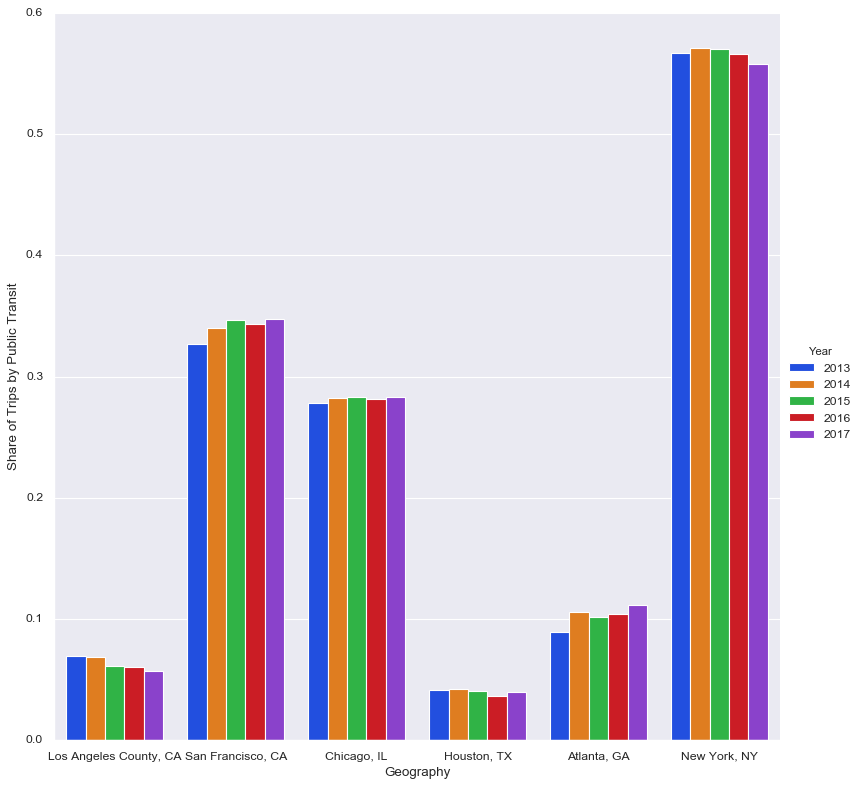

In [373]:
build_transpo_graphs(df_list,'Public Transit')

In [330]:
def build_yearly_transpo_graphs(df_list, type_of_transpo, year):
    
    '''Does the same as build_transpo_graphs but just for one year'''
    
    specific_df = pd.DataFrame()
    for i in df_list:
        specific_df = specific_df.append(build_year_restricted_df(i, type_of_transpo, year))
    plt.figure(figsize=(30,40))
    sns.factorplot(x='Geography', y='share', hue='Year', data=specific_df, kind='bar', size=10)

<Figure size 2400x3200 with 0 Axes>

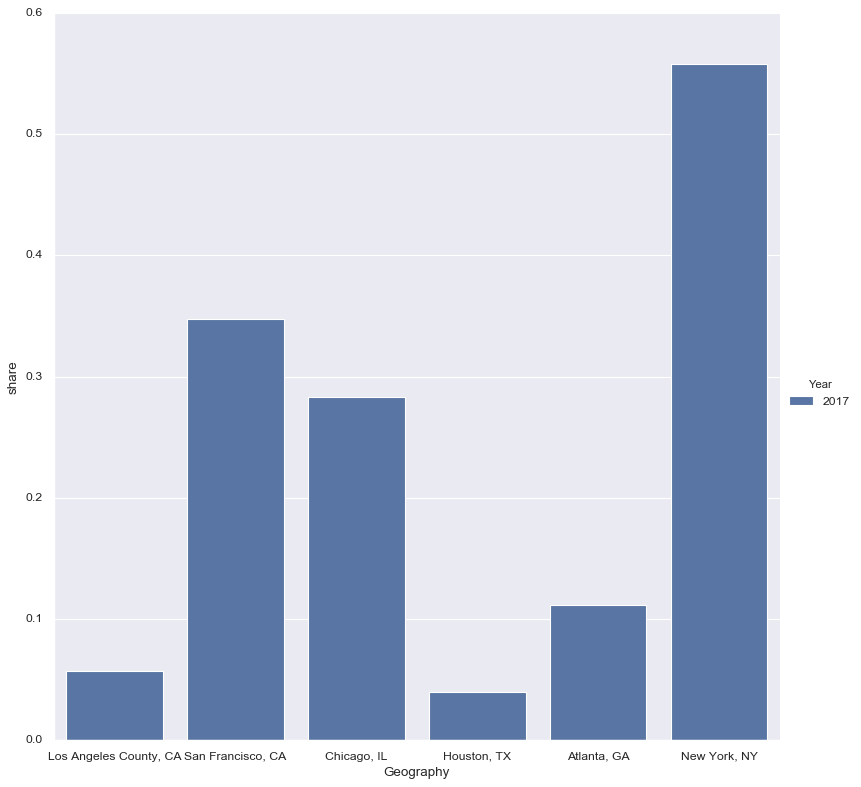

In [331]:
###for example:

build_yearly_transpo_graphs(df_list,'Public Transit', 2017)

In [323]:
san_francisco_df.head()

,ID Group,Group,ID Year,Year,Commute Means,Commute Means Moe,Geography,ID Geography,Slug Geography,share
0,4,Motorcycle,2017,2017,238540,9648.000000,United States,01000US,united-states,0.001561
1,8,Worked At Home,2017,2017,37465,3298.000000,"San Francisco, CA",16000US0667000,san-francisco-ca,0.071585
2,7,Other,2017,2017,9046,2114.000000,"San Francisco, CA",16000US0667000,san-francisco-ca,0.017284
3,1,Carpooled,2017,2017,13604253,77767.855461,United States,01000US,united-states,0.089032
4,6,Walked,2017,2017,62548,4562.000000,"San Francisco, CA",16000US0667000,san-francisco-ca,0.119511


<Figure size 2400x3200 with 0 Axes>

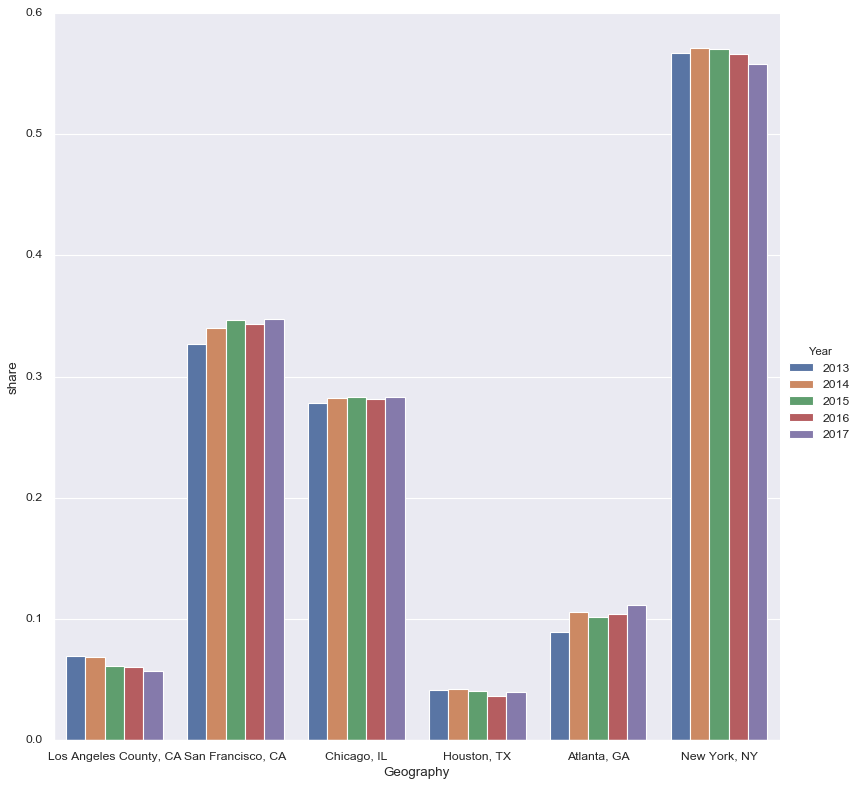

In [277]:
build_transpo_sets(df_list, 'Drove Alone')

,ID Group,Group,ID Year,Year,Commute Means,Commute Means Moe,Geography,ID Geography,Slug Geography,share
16,0,Drove Alone,2017,2017,3622985,22850.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.746004
33,0,Drove Alone,2016,2016,3525431,23176.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.739109
38,0,Drove Alone,2015,2015,3489716,23252.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.741300
55,0,Drove Alone,2014,2014,3382298,22556.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.731495
89,0,Drove Alone,2013,2013,3264307,21699.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.726654
16,0,Drove Alone,2017,2017,169406,6319.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.323687
33,0,Drove Alone,2016,2016,168473,6407.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.336630
38,0,Drove Alone,2015,2015,175284,5720.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.352590
55,0,Drove Alone,2014,2014,164564,5337.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.342131
89,0,Drove Alone,2013,2013,172073,6062.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.364215


In [264]:
specific_df

,ID Group,Group,ID Year,Year,Commute Means,Commute Means Moe,Geography,ID Geography,Slug Geography,share
8,4,Motorcycle,2017,2017,11378,1911.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.002343
35,4,Motorcycle,2016,2016,11713,2022.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.002456
36,4,Motorcycle,2015,2015,12213,1423.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.002594
63,4,Motorcycle,2014,2014,12449,1413.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.002692
81,4,Motorcycle,2013,2013,10810,1644.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.002406
8,4,Motorcycle,2017,2017,5370,1549.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.010261
35,4,Motorcycle,2016,2016,5449,1457.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.010888
36,4,Motorcycle,2015,2015,3894,1008.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.007833
63,4,Motorcycle,2014,2014,4095,1104.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.008514
81,4,Motorcycle,2013,2013,4405,1155.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.009324


In [124]:
full_df = la_drove_alone.append(sf_drove_alone).append(chicago_drove_alone).append(houston_drove_alone).append(atlanta_drove_alone).append(us_drove_alone)
full_df.head(20)

,ID Group,Group,ID Year,Year,Commute Means,Commute Means Moe,Geography,ID Geography,Slug Geography,share
16,0,Drove Alone,2017,2017,3622985,22850.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.746004
33,0,Drove Alone,2016,2016,3525431,23176.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.739109
38,0,Drove Alone,2015,2015,3489716,23252.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.741300
55,0,Drove Alone,2014,2014,3382298,22556.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.731495
89,0,Drove Alone,2013,2013,3264307,21699.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.726654
16,0,Drove Alone,2017,2017,169406,6319.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.323687
33,0,Drove Alone,2016,2016,168473,6407.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.336630
38,0,Drove Alone,2015,2015,175284,5720.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.352590
55,0,Drove Alone,2014,2014,164564,5337.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.342131
89,0,Drove Alone,2013,2013,172073,6062.0,"San Francisco, CA",16000US0667000,san-francisco-ca,0.364215


In [47]:
#plot 'drove alone' data for each city and each year:

import seaborn as sns
sns.set()



In [122]:
full_df.head()

,ID Group,Group,ID Year,Year,Commute Means,Commute Means Moe,Geography,ID Geography,Slug Geography,share
16,0,Drove Alone,2017,2017,3622985,22850.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.746004
33,0,Drove Alone,2016,2016,3525431,23176.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.739109
38,0,Drove Alone,2015,2015,3489716,23252.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.741300
55,0,Drove Alone,2014,2014,3382298,22556.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.731495
89,0,Drove Alone,2013,2013,3264307,21699.0,"Los Angeles County, CA",05000US06037,los-angeles-county-ca,0.726654


<Figure size 2400x2400 with 0 Axes>

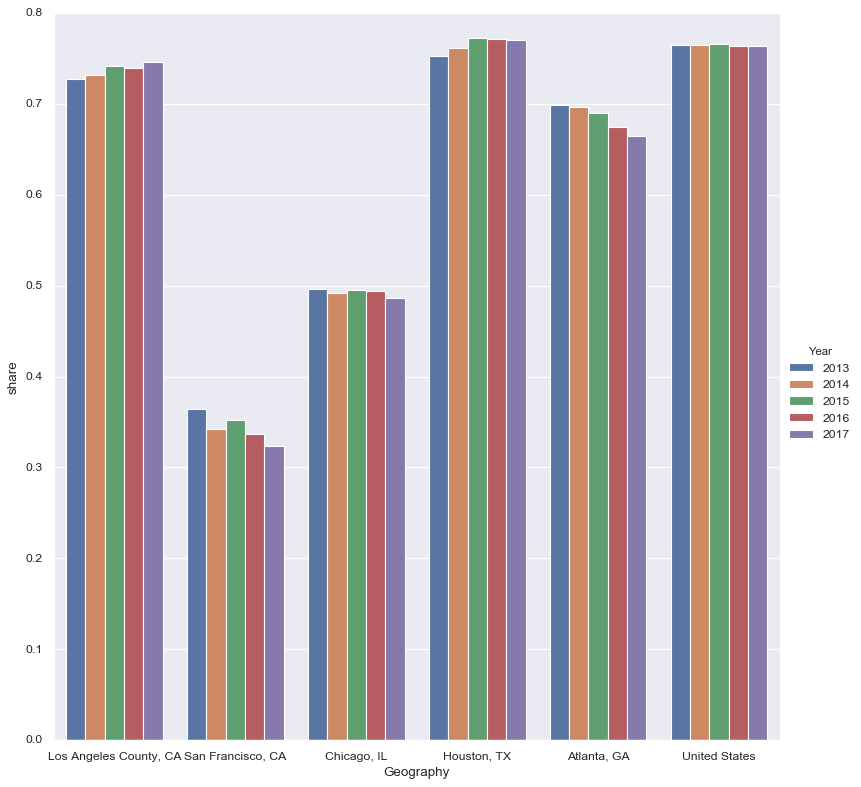

In [279]:
plt.figure(figsize=(30,30))
sns.factorplot(x='Geography', y='share', hue='Year', data=full_df, kind='bar', size=10)

In [119]:
###automate process, for each transpo type:



    

In [239]:
from datetime import datetime

In [263]:
import datetime

today = datetime.date.today()
anniversary = datetime.date(2016, 1, 15)
diff = today - anniversary
diff.days

1331

In [ ]:
###generalizing further,here's the api for the new york transpo data:

https://datausa.io/profile/geo/new-york-ny#mode_transport

http://datausa.io/api/data?measure=Commute%20Means,Commute%20Means%20Moe&geo=16000US3651000,01000US&drilldowns=Group

In [310]:
from bokeh.plotting import figure, show, output_file